In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the model-ready dataset
df = pd.read_csv('telco_feature_engineered.csv')

df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,True,False,False,True,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,True,False,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,True,False,False,True,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,False,True,False,False,False,False,True,False


In [3]:
# Feature-Target Split
X = df.drop('Churn', axis=1)
y = df['Churn']

In [4]:
# Load the final selected Logistic Regression model
log_model = joblib.load('final_model.pkl')

In [5]:
# Extract Model Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
})

coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(
    by='Absolute_Coefficient',
    ascending=False
)

coefficients.head(10)

,Feature,Coefficient,Absolute_Coefficient
19,Contract_Two year,-1.359140,1.359140
18,Contract_One year,-0.697690,0.697690
4,PhoneService,-0.660762,0.660762
16,InternetService_Fiber optic,0.654459,0.654459
17,InternetService_No,-0.632312,0.632312
6,OnlineSecurity,-0.437980,0.437980
9,TechSupport,-0.388645,0.388645
12,PaperlessBilling,0.377701,0.377701
21,PaymentMethod_Electronic check,0.374823,0.374823
5,MultipleLines,0.254417,0.254417


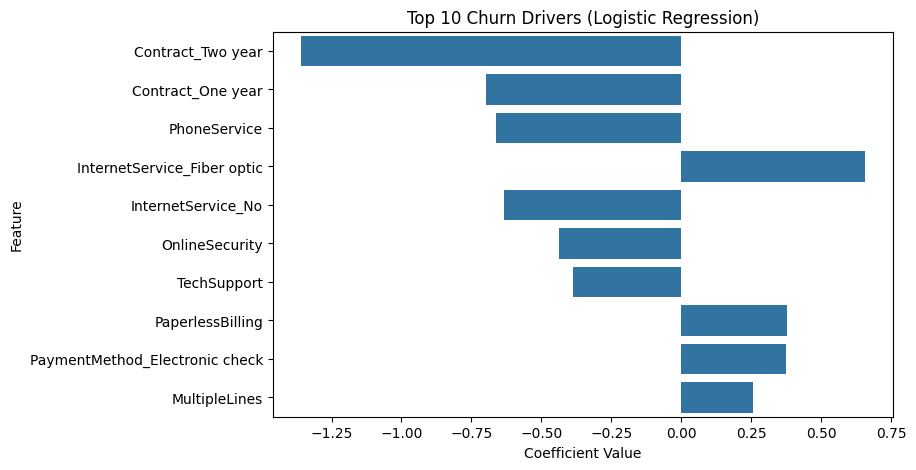

In [6]:
# Coefficient Visualization
plt.figure(figsize=(8,5))
sns.barplot(
    data=coefficients.head(10),
    x='Coefficient',
    y='Feature'
)
plt.title('Top 10 Churn Drivers (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [7]:
# Churn Probability Scoring
df['churn_probability'] = log_model.predict_proba(X)[:, 1]

df[['churn_probability']].head()

,churn_probability
0,0.608251
1,0.046647
2,0.296258
3,0.030064
4,0.693965


In [8]:
# Segment customers based on churn probability
df['risk_segment'] = pd.cut(
    df['churn_probability'],
    bins=[0, 0.33, 0.66, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

df['risk_segment'].value_counts()

,count
risk_segment,
Low Risk,4580
Medium Risk,1772
High Risk,691


In [9]:
# Export final scored dataset for dashboard and business use
df.to_csv('churn_risk_scored_customers.csv', index=False)

### Business Recommendations:

**High Risk Customers**
- Immediate retention offers and personalized communication
- Priority support and service recovery actions

**Medium Risk Customers**
- Engagement campaigns and loyalty incentives
- Plan optimization and usage nudges

**Low Risk Customers**
- Maintain service quality
- Cross-sell and upsell opportunities

Applying targeted strategies based on these segments can significantly
reduce churn and improve customer lifetime value.

## Summary of Model Explainability & Business Insights:
In this notebook, the final Logistic Regression model was interpreted using model coefficients. Key churn drivers were identified, customers were segmented based on churn risk, and actionable business recommendations were derived.
The final dataset was exported for dashboarding and decision-making.